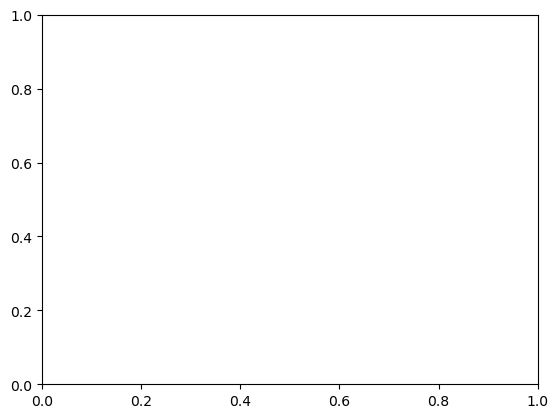

In [5]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox
from tkinter import simpledialog
import json
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
import seaborn as sns
import os
import warnings


#initialise window and variables
window = tk.Tk()
window.title('Data Program')
window.geometry("1000x600")
main_frame = tk.Frame(window)
main_frame.pack()
import_files = []
file1 = []
file2 = []
load_list = []


#misc methods

def get_file_name(absolute_path):
    relative_path = absolute_path.split('/')[-1]
    file_name = relative_path[:-4] + '.json'
    return file_name


#homepage button commands
def man_viz():
    main_frame.pack_forget()
    mv_frame.pack()
    nav_frame.pack()

def mv_back():
    mv_frame.pack_forget()
    nav_frame.pack_forget()
    main_frame.pack()

def prep_data():
    main_frame.pack_forget()
    pd_frame.pack()

def pd_back():
    pd_frame.pack_forget()
    main_frame.pack()

def import_csv():
    #create new directory if there isn't already one
    try:
        os.mkdir('AP Prototype Saved Files')
    except:
        pass

    #get csv and convert to dataframe
    imported = filedialog.askopenfilename(initialdir = "/",     
                                            title = "Select a File",
                                            filetypes = (("CSV files",
                                                            "*.csv*"),))
    try:
        temp_df = pd.read_csv(imported, encoding='ISO-8859-1', index_col=0)
        json_dict = temp_df.to_dict()

        #create new file name from the imported csv
        new_file = get_file_name(imported)
        cwd=os.getcwd()
        new_file_path = cwd + '\\AP Prototype Saved Files\\' + new_file
        
        #save to json file
        with open(new_file_path, 'w') as file:
            json.dump(json_dict, file)
        
        messagebox.showinfo('Succesful Import', 
                            f'CSV file has been succesfully imported! {new_file} is saved and ready for use')
        
        if new_file not in import_files:
            imported_list.insert(tk.END, new_file)
        else:
            pass

    except FileNotFoundError:
        messagebox.showerror('No File Selected', 
                             'No file selected, please load a valid CSV file.')


#create homepage units
style = ttk.Style()
style.configure('labels.TLabel', foreground='black')
imp_button = ttk.Button(main_frame, width=30, text='Import CSV', command=import_csv)
imported_label= ttk.Label(main_frame, text='Saved files:', style='labels.TLabel')
imported_list = tk.Listbox(main_frame, bg='#E5ECEF', fg='black', height=10)
man_viz_button = ttk.Button(main_frame, text='Manipulation and visualization', 
                            width=30, command=man_viz)
options = ttk.Label(main_frame, text='Options', style='labels.TLabel')
prep_data_button = ttk.Button(main_frame, text='Prepare Dataset', width=30, 
                              command=prep_data)

#configure homepage structure
main_frame.grid_columnconfigure(2,weight=1)
main_frame.grid_rowconfigure(5, weight=1)

#homepage column 0
options.grid(row=0, column=0, sticky='NSEW', padx=10)
imp_button.grid(row=1, column=0, sticky='NSEW', padx=10)
prep_data_button.grid(row=2, column=0, sticky='NSEW', padx=10)
man_viz_button.grid(row=3, column=0, sticky='NSEW', padx=10)

#display saved files in listbox
try:
    cwd1=os.getcwd()
    save_folder_path = cwd1 + '\\AP Prototype Saved Files\\'
    save_folder = os.listdir(save_folder_path)
    for saved_file in save_folder:
        imported_list.insert(tk.END, saved_file)
    for saved_file in save_folder:
        import_files.insert(saved_file)
except:
    pass

#homepage column 1
imported_label.grid(row=0, column=1, sticky='NSEW', padx=10)
imported_list.grid(row=1, rowspan=4, column=1, sticky='NSEW', padx=10)



#data preparation button commands
def data1_load():
    load1 = filedialog.askopenfilename(initialdir = os.getcwd() + '\\AP Prototype Saved Files',     
                                        title = "Select a File",
                                        filetypes = (("JSON files", "*.json*"),))
    
    file1.clear()
    file1.append(load1)
    
    data1_sel.delete(0, tk.END)
    file_name1 = get_file_name(load1[:-1])
    if load1 != '':
        data1_sel.insert(tk.END, file_name1)
    else:
        pass

def data2_load():
    load2 = filedialog.askopenfilename(initialdir = os.getcwd() + '\\AP Prototype Saved Files',     
                                        title = "Select a File",
                                        filetypes = (("JSON files", "*.json*"),))
    
    file2.clear()
    file2.append(load2)

    data2_sel.delete(0, tk.END)
    file_name2 = get_file_name(load2[:-1])
    if load2 != '':
        data2_sel.insert(tk.END, file_name2)
    else:
        pass

def clean_data():

    if len(file1) == 0 and len(file2) == 0:
        messagebox.showerror('Datasets Missing', 
                             'NO FILES FOUND: Please load two valid JSON files')
    elif len(file1) == 0 and len(file2) > 0:
        messagebox.showerror('Dataset Missing', 
                             'No files found for Dataset 1, please load a valid JSON file')
    elif len(file1) > 0 and len(file2) == 0:
        messagebox.showerror('Dataset Missing', 
                             'No files found for Dataset 2, please load a valid JSON file')
    else:
        try:
            ant = pd.read_json(file1[-1], encoding='ISO-8859-1')
            params = pd.read_json(file2[-1], encoding='ISO-8859-1')

            #extract EID values from TxParamsDAB
            try:
                c18a = params[params['EID'] == 'C18A']
                c18f = params[params['EID'] == 'C18F']
                c188 = params[params['EID'] == 'C188']
                new_params = pd.concat([c18a, c18f, c188])
            except KeyError:
                messagebox.showerror('Key Error', 
                                    'Error: EID value missing in column headers for Dataset 2. Please use a json file with valid headers.')

            #extract columns from TxAntennaDAB
            try:
                ngr = ant.loc[:, ['NGR', 'Site Height', 'In-Use Ae Ht', 'In-Use ERP Total']]
            except KeyError:
                messagebox.showerror('Key Error', 
                                    'Error: Header values are missing in Dataset 1. Please use a json file with valid headers.')

            joined = pd.concat([ngr, new_params], axis=1, join='inner')

            #remove unneeded NGR values
            try:
                remove_ngr = joined[(joined['NGR'] != 'NZ02553847') & 
                        (joined['NGR'] != 'SE213515') &
                        (joined['NGR'] != 'NT05399374') &
                        (joined['NGR'] != 'NT25265908')]
            except KeyError:
                messagebox.showerror('Key Error', 
                                    'Error: NGR value missing in column headers for Dataset 1. Please use a json file with valid headers.')

            #convert Date to type str for serialization to json
            date_string = remove_ngr.astype({'Date' : str})

            #rename column headers
            headers = date_string.rename(columns={'In-Use Ae Ht' : 'Aerial height(m)', 
                                                'In-Use ERP Total' : 'Power(kW)'})
            #re-format Power values
            headers['Power(kW)'] = headers['Power(kW)'].replace('\.', '', regex=True)
            headers['Power(kW)'] = headers['Power(kW)'].replace(',', '', regex=True)
            final_clean = headers.astype({'Power(kW)' : float})

            cleaned = final_clean.to_dict()

            save_path = filedialog.asksaveasfilename(initialdir = os.getcwd() + '\\AP Prototype Saved Files',     
                                                        title = "Select a File",
                                                        filetypes = (("JSON files", "*.json*"),),
                                                        defaultextension = '.json')
            
            #serialize and save to json
            with open(save_path, 'w') as file:
                json.dump(cleaned, file)

            #get new file name insert into saved files list
            clean_file = get_file_name(save_path[:-1])

            if clean_file not in import_files:
                imported_list.insert(tk.END, clean_file)
            else:
                pass

            messagebox.showinfo('Data Saved', 
                                f'Data has been succesfully prepared! {clean_file} is saved and ready for use')
        except:
            messagebox.showerror('Datasets Missing', 
                             'NO FILES FOUND: Please load two valid JSON files')
            
#prep data frame configuration
pd_frame = tk.Frame(window)

pd_label = ttk.Label(pd_frame, text='Please load two JSON files to clean and combine', style='labels.TLabel')
spacer0 = ttk.Label(pd_frame, text='', style='labels.TLabel')
data1 = ttk.Button(pd_frame, text='Dataset 1 - (with NGR values in header)', width=5, command=data1_load)
data1_sel = tk.Listbox(pd_frame, width=5, height=1, bg='#E5ECEF')
spacer1 = ttk.Label(pd_frame, text="", style='labels.TLabel')
data2 = ttk.Button(pd_frame, text='Dataset 2 - (with EID values in header)', width=5, command=data2_load)
data2_sel = tk.Listbox(pd_frame, width=5, height=1, bg='#E5ECEF')
spacer2 = ttk.Label(pd_frame, text="", style='labels.TLabel')
clean_button = ttk.Button(pd_frame, width=5, text='Clean & Save', command=clean_data)
spacer3 = ttk.Label(pd_frame, text="", style='labels.TLabel')
spacer4 = ttk.Label(pd_frame, text="", style='labels.TLabel')
pd_back_button = ttk.Button(pd_frame, width=5, text='Back', command=pd_back)

#pd structure
pd_frame.grid_columnconfigure(1,weight=1)
pd_frame.grid_rowconfigure(11, weight=1)

#pd column 0
pd_label.grid(row=0, column=0, sticky='NSEW', padx=10)
spacer0.grid(row=1, column=0, sticky='NSEW', padx=10)
data1.grid(row=2, column=0, sticky='NSEW', padx=10)
data1_sel.grid(row=3, column=0, sticky='NSEW', padx=10)
spacer1.grid(row=4, column=0, sticky='NSEW', padx=10)
data2.grid(row=5, column=0, sticky='NSEW', padx=10)
data2_sel.grid(row=6, column=0, sticky='NSEW', padx=10)
spacer2.grid(row=7, column=0, sticky='NSEW', padx=10)
clean_button.grid(row=8, column=0, padx=10, sticky='NSEW')
spacer3.grid(row=9, column=0, sticky='NSEW', padx=10)
spacer4.grid(row=10, column=0, sticky='NSEW', padx=10)
pd_back_button.grid(row=11, column=0, padx=10, sticky='NSEW')


#manipulation/visualisation (mv) commands

def get_path():
    loaded_path = filedialog.askopenfilename(initialdir = os.getcwd() + '\\AP Prototype Saved Files',     
                                        title = "Select a File",
                                        filetypes = (("JSON files", "*.json*"),))
    load_list.clear()
    load_list.append(loaded_path)

    loaded_name = get_file_name(loaded_path[:-1])

    if loaded_path != '':
        loaded_display.delete(0, tk.END)
        loaded_display.insert(tk.END, loaded_name)
    else:
        pass

def get_loaded():
    try:
        loaded = pd.read_json(load_list[0])
        return loaded
    except IndexError or ValueError or AttributeError:
        messagebox.showerror('Data Missing', 
                             'NO FILES LOADED: Please load valid JSON file')

    
#averages by site height
def mean_height():
    ax.clear()
    mean_data = get_loaded()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        try:
            by_height = mean_data.pivot_table('Power(kW)', index='Site Height', 
                                              columns='EID').reset_index()
            
            min_height = simpledialog.askinteger(title="Minimum Site Height", 
                                                 prompt="Please enter a min site height?")
            over_height = by_height[by_height['Site Height'] > min_height]

            mean_by_height = []

            for eid in over_height:
                mean_by_height.append(over_height.loc[:, [eid]].dropna().mean())

            mean_by_height.remove(mean_by_height[0])
            height_mean = pd.DataFrame(mean_by_height)
            sns.barplot(data=height_mean, ax=ax).set(title=f'Mean - Site Height Above {min_height}')
            canvas.draw()
        except AttributeError or ValueError:
            pass
        except KeyError:
            messagebox.showerror('KeyError', 
                             'KeyError: Invalid dataset, please load a dataset with valid column headers')

def median_height():
    ax.clear()
    median_data = get_loaded()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        try:
            by_height = median_data.pivot_table('Power(kW)', index='Site Height', 
                                                columns='EID').reset_index()
            min_height = simpledialog.askinteger(title="Minimum Site Height",
                                        prompt="Please enter a min site height")
            over_height = by_height[by_height['Site Height'] > min_height]

            median_by_height = []

            #calculate median
            for eid in over_height:
                median_by_height.append(over_height.loc[:, [eid]].dropna().median())

            median_by_height.remove(median_by_height[0])
            height_median = pd.DataFrame(median_by_height)
            sns.barplot(data=height_median, ax=ax).set(title=f'Median - Site Height Above {min_height}')
            canvas.draw()
        except AttributeError or ValueError:
            pass
        except KeyError:
            messagebox.showerror('KeyError', 
                             'KeyError: Invalid dataset, please load a dataset with valid column headers')


def mode_height():
    ax.clear()
    mode_data = get_loaded()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        try:
            by_height = mode_data.pivot_table('Power(kW)', index='Site Height', 
                                                columns='EID').reset_index()
            min_height = simpledialog.askinteger(title="Minimum Site Height",
                                        prompt="Please enter a min site height")
            over_height = by_height[by_height['Site Height'] > min_height]

            #calculate mode
            mode_1 = over_height.iloc[:, 1].dropna().mode()
            mode_2 = over_height.iloc[:, 2].dropna().mode()
            mode_3 = over_height.iloc[:, 3].dropna().mode()

            if len(mode_1) == 1:
                mode_df1 = pd.DataFrame(mode_1)
            else:
                mode_df1 = pd.DataFrame()

            if len(mode_2) == 1:
                mode_df2 = pd.DataFrame(mode_2)
            else:
                mode_df2 = pd.DataFrame()

            if len(mode_3) == 1:
                mode_df3 = pd.DataFrame(mode_3)
            else:
                mode_df3 = pd.DataFrame()

            height_mode = pd.concat([mode_df1, mode_df2, mode_df3])

            try:
                sns.barplot(data=height_mode, ax=ax).set(title=f'Mode - Site Height Above {min_height}')
            except ValueError:
                    messagebox.showerror('Integer too Large', 
                             'ValueError: Site height was too large, please enter a smaller height')
            canvas.draw()
        except AttributeError or ValueError:
            pass
        except KeyError:
            messagebox.showerror('KeyError', 
                             'KeyError: Invalid dataset, please load a dataset with valid column headers')

#averages by date
def mean_date():
    ax.clear()
    mean_data = get_loaded()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        try:
            by_date = mean_data.pivot_table('Power(kW)', index='Date',
                                       columns='EID').reset_index()

            start_date = simpledialog.askstring(title="Enter Start Date",
                                    prompt="Please enter start date to calculate mean from (date format: YYYY-MM-DD)")

            after_date = by_date[by_date['Date'] >= start_date]

            mean_by_date = []

            for eid in after_date:
                mean_by_date.append(after_date.loc[:, [eid]].dropna().mean())

            mean_by_date.remove(mean_by_date[0])
            date_mean = pd.DataFrame(mean_by_date)
            sns.barplot(data=date_mean, ax=ax).set(title=f'Mean - Since {start_date}')
            canvas.draw()
        except AttributeError or ValueError:
            pass
        except TypeError:
            messagebox.showerror('TypeError', 
                             'TypeError: Please enter a valid date using format YYYY-MM-DD')
        except KeyError:
            messagebox.showerror('KeyError', 
                             'KeyError: Invalid dataset, please load a dataset with valid column headers')
                
def median_date():
    ax.clear()
    median_data = get_loaded()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        try:
            by_date = median_data.pivot_table('Power(kW)', index='Date',
                                       columns='EID').reset_index()

            start_date = simpledialog.askstring(title="Enter Start Date",
                                    prompt="Please enter start date to calculate median from (date format: YYYY-MM-DD)")

            after_date = by_date[by_date['Date'] >= start_date]

            median_by_date = []

            for eid in after_date:
                median_by_date.append(after_date.loc[:, [eid]].dropna().median())

            median_by_date.remove(median_by_date[0])
            date_mean = pd.DataFrame(median_by_date)
            sns.barplot(data=date_mean, ax=ax).set(title=f'Median - Since {start_date}')
            canvas.draw()
        except AttributeError or ValueError:
            pass
        except TypeError:
            messagebox.showerror('TypeError', 
                             'TypeError: Please enter a valid date using format YYYY-MM-DD')
        except KeyError:
            messagebox.showerror('KeyError', 
                             'KeyError: Invalid dataset, please load a dataset with valid column headers')

def mode_date():
    ax.clear()
    mode_data = get_loaded()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        try:
            by_date = mode_data.pivot_table('Power(kW)', index='Date',
                                        columns='EID').reset_index()
            
            start_date = simpledialog.askstring(title="Enter Start Date",
                                        prompt="Please enter start date to calculate median from (date format: YYYY-MM-DD)")
            
            after_date = by_date[by_date['Date'] >= start_date]

            #calculate mode
            mode_1 = after_date.iloc[:, 1].dropna().mode()
            mode_2 = after_date.iloc[:, 2].dropna().mode()
            mode_3 = after_date.iloc[:, 3].dropna().mode()

            if len(mode_1) == 1:
                mode_df1 = pd.DataFrame(mode_1)
            else:
                mode_df1 = pd.DataFrame()

            if len(mode_2) == 1:
                mode_df2 = pd.DataFrame(mode_2)
            else:
                mode_df2 = pd.DataFrame()

            if len(mode_3) == 1:
                mode_df3 = pd.DataFrame(mode_3)
            else:
                mode_df3 = pd.DataFrame()

            date_mode = pd.concat([mode_df1, mode_df2, mode_df3])
            sns.barplot(data=date_mode, ax=ax).set(title=f'Mode - Site Height Above {start_date}')
            canvas.draw()
        except AttributeError:
            pass
        except ValueError:
            messagebox.showerror('ValueError', 
                                'ValueError: There is either no mode or an invalid JSON has been used')
        except TypeError:
            messagebox.showerror('TypeError', 
                                'TypeError: Please enter a valid date using format YYYY-MM-DD')
        except KeyError:
            messagebox.showerror('KeyError', 
                                'KeyError: Invalid dataset, please load a dataset with valid column headers')

#DAB Multiplex visualisation commands
def dab_viz():
    ax.clear()

    try:
        dab_data = get_loaded()

        try:
            new = dab_data.loc[:, ['EID', 'Site', 'Freq.', 'Block', 'Serv Label1 ', 
                                   'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ', 
                                   'Serv Label10 ']]
            ct_list = []
            serv_labels = list(new.columns.values)[4:9]
            
            for label in serv_labels:
                cross_tabs = pd.crosstab([new['Freq.'], new['Block']], [new[label]])
                ct_list.append(cross_tabs)
            
            joined = pd.concat([ct_list[0], ct_list[1], ct_list[2], ct_list[3], ct_list[4]], 
                               axis=1, join='inner').transpose()
            site_split = pd.crosstab([new['Site']], [new['Freq.'], new['Block']])

            split1 = joined.iloc[:, :1]
            split2 = joined.iloc[:, 1:]
            split3 = site_split.iloc[:, :1]
            split4 = site_split.iloc[:, 1:]
            
            by_eid = pd.crosstab([new['EID']], [new['Freq.'], new['Block']]).transpose()
            by_serv_labels = pd.DataFrame(joined.transpose().sum())

            #initialise new window
            fig1 = plt.figure(figsize=(15, 15), dpi = 150)
            ax1 = fig1.add_subplot(2, 3, 1)
            ax2 = fig1.add_subplot(2, 3, 2)
            ax3 = fig1.add_subplot(2, 3, 4)
            ax4 = fig1.add_subplot(2, 3, 5)
            ax5 = fig1.add_subplot(2, 3, 3)
            ax6 = fig1.add_subplot(2, 3, 6)

            viz_window = tk.Tk()
            viz_window.title('DAB Multiplex Visualisation')
            viz_window.geometry("1500x900")
            canvas1 = FigureCanvasTkAgg(fig1, master=viz_window)
            canvas1.get_tk_widget().pack()
            tb1 = NavigationToolbar2Tk(canvas1, viz_window)
            tb1.update()

            split1.plot(ax=ax1, kind='pie', subplots=True, title='DAB Multiplex Visualisation (C18A, C18F, C188)', 
                        legend=False, fontsize=5, rotatelabels=True, labeldistance=0.25)
            ax1.yaxis.set_label_position('left')
            split2.plot(ax=ax2, kind='pie', subplots=True, legend=False, fontsize=5, 
                        rotatelabels=True, labeldistance=0.25)
            ax2.yaxis.set_label_position('left')
            split3.plot(ax=ax3, kind='pie', subplots=True, legend=False, fontsize=5, 
                        rotatelabels=True, labeldistance=0.25)
            ax3.yaxis.set_label_position('left')
            split4.plot(ax=ax4, kind='pie', subplots=True, legend=False, fontsize=5, 
                        rotatelabels=True, labeldistance=0.25)
            ax4.yaxis.set_label_position('left')
            by_eid.plot(ax=ax5, kind='bar', fontsize=5, rot=0)
            by_serv_labels.plot(ax=ax6, kind='bar', legend=False, fontsize=5, rot=55)

            canvas1.draw()

        except KeyError:
            messagebox.showerror('Error', 
                                'ERROR: Please load a valid JSON file')
        except AttributeError or ValueError or TypeError:
            pass
    except ValueError:
            messagebox.showerror('Error', 
                                 'ERROR: Please load a valid JSON file')
    except AttributeError or TypeError:
        pass

def corr_viz():
    ax.clear()

    try:
        dab_data = get_loaded()

        try:
            new = dab_data.loc[:, ['EID', 'Site', 'Freq.', 'Block', 'Serv Label1 ', 
                                   'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ', 
                                   'Serv Label10 ']]                 
            corr_list = []
            ct_list = []
            serv_labels = list(new.columns.values)[4:9]
            
            for label in serv_labels:
                cross_tabs = pd.crosstab([new['Freq.'], new['Block']], [new[label]]).transpose()
                corr = cross_tabs.corr().iloc[0, 1]
                ct_list.append(cross_tabs)
                corr_list.append(corr)

            corr_df = pd.DataFrame(corr_list, serv_labels, columns=['Correlation Coefficient']
                                   ).round(2)
            
            #initialise new window
            fig1 = plt.figure(figsize=(15, 15), dpi = 150)
            ax1 = fig1.add_subplot(2, 3, 1)
            ax2 = fig1.add_subplot(2, 3, 2)
            ax3 = fig1.add_subplot(2, 3, 3)
            ax4 = fig1.add_subplot(2, 3, 4)
            ax5 = fig1.add_subplot(2, 3, 5)
            ax6 = fig1.add_subplot(2, 3, 6)

            viz_window = tk.Tk()
            viz_window.title('DAB Multiplex Correlation')
            viz_window.geometry("1500x1100")
            canvas1 = FigureCanvasTkAgg(fig1, master=viz_window)
            canvas1.get_tk_widget().pack()
            tb1 = NavigationToolbar2Tk(canvas1, viz_window)
            tb1.update()

            ct_list[0].plot(kind='line', ax=ax1, fontsize=5)
            ax1.xaxis.set_label_position('top')
            ct_list[1].plot(kind='line', ax=ax2, fontsize=5)
            ax2.xaxis.set_label_position('top')
            ct_list[2].plot(kind='line', ax=ax3, fontsize=5)
            ax3.xaxis.set_label_position('top')
            ct_list[3].plot(kind='line', ax=ax4, fontsize=5)
            ax4.xaxis.set_label_position('top')
            ct_list[4].plot(kind='line', ax=ax5, fontsize=5)
            ax5.xaxis.set_label_position('top')
            corr_df.plot(kind='bar', ax=ax6, title='Correlation Coefficient', fontsize=5,
                         legend=False).bar_label(ax6.containers[0], label_type='center', fontsize=5)
            fig.tight_layout()

            canvas.draw()

        except KeyError or ValueError:
            messagebox.showerror('Error', 
                                 'ERROR: Please load a valid JSON file')
        except AttributeError or TypeError:
            pass
    except ValueError:
            messagebox.showerror('Error', 
                                 'ERROR: Please load a valid JSON file')
    except AttributeError or TypeError:
        pass
  
#mv frame configuration
mv_frame = tk.Frame(window)
loaded_display = tk.Listbox(mv_frame, height=1, bg='#E5ECEF')
load_button = ttk.Button(mv_frame, text='Load Data', command=get_path)
height_label = ttk.Label(mv_frame, text='Averages by Site Height', 
                         style='labels.TLabel')
date_label = ttk.Label(mv_frame, text='Averages by Date', style='labels.TLabel')
height_mean_button = ttk.Button(mv_frame, text='Mean', command=mean_height)
height_median_button = ttk.Button(mv_frame, text='Median', command=median_height)
height_mode_button = ttk.Button(mv_frame, text='Mode', command=mode_height)
date_mean_button = ttk.Button(mv_frame, text='Mean', command=mean_date)
date_median_button = ttk.Button(mv_frame, text='Median', command=median_date)
date_mode_button = ttk.Button(mv_frame, text='Mode', command=mode_date)
mv_back_button = ttk.Button(mv_frame, text='Back', command=mv_back)

viz_label = ttk.Label(mv_frame, text='DAB Multiplex Visualisation', style='labels.TLabel')
viz_button = ttk.Button(mv_frame, text='DAB Multiplex Visualisation', command=dab_viz)
corr_label = ttk.Label(mv_frame, text='DAB Multiplex Correlation', style='labels.TLabel')
corr_button = ttk.Button(mv_frame, text='DAB Multiplex Correlation', command=corr_viz)

spacer5 = ttk.Label(mv_frame, text="", style='labels.TLabel')
spacer6 = ttk.Label(mv_frame, text="", style='labels.TLabel')
spacer7 = ttk.Label(mv_frame, text="", style='labels.TLabel')
spacer8 = ttk.Label(mv_frame, text="", style='labels.TLabel')
spacer9 = ttk.Label(mv_frame, text="", style='labels.TLabel')
spacer10 = ttk.Label(mv_frame, text="", style='labels.TLabel')

#matlpotlib configure
nav_frame = tk.Frame(window)

mv_title = ttk.Label(mv_frame, text="Data Manipulation and Visualization", style='labels.TLabel')
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=mv_frame)
canvas.draw()

#mv structure
mv_frame.grid_columnconfigure(3,weight=1)
mv_frame.grid_rowconfigure(17, weight=1)

#mv column 0
spacer5.grid(row=0, column=0, sticky='NSEW', padx=10)
loaded_display.grid(row=1, column=0, sticky='NSEW', padx=10)
load_button.grid(row=2, column=0, sticky='NSEW', padx=10)
spacer5.grid(row=3, column=0, sticky='NSEW', padx=10)
height_label.grid(row=4, column=0, sticky='NSEW', padx=10)
height_mean_button.grid(row=5, column=0, sticky='NSEW', padx=10)
height_median_button.grid(row=6, column=0, sticky='NSEW', padx=10)
height_mode_button.grid(row=7, column=0, sticky='NSEW', padx=10)
spacer6.grid(row=8, column=0, sticky='NSEW', padx=10)
date_label.grid(row=9, column=0, sticky='NSEW', padx=10)
date_mean_button.grid(row=10, column=0, sticky='NSEW', padx=10)
date_median_button.grid(row=11, column=0, sticky='NSEW', padx=10)
date_mode_button.grid(row=12, column=0, sticky='NSEW', padx=10)
spacer7.grid(row=14, column=0, sticky='NSEW', padx=10)
spacer8.grid(row=15, column=0, sticky='NSEW', padx=10)
mv_back_button.grid(row=16, column=0, padx=10, sticky='SEW')

#mv column 1
spacer9.grid(row=0, column=1, sticky='NSEW', padx=10)
viz_label.grid(row=1, column=1, sticky='NSEW', padx=10)
viz_button.grid(row=2, column=1, sticky='NSEW', padx=10)
spacer10.grid(row=3, column=1, sticky='NSEW', padx=10)
corr_label.grid(row=4, column=1, sticky='NSEW', padx=10)
corr_button.grid(row=5, column=1, sticky='NSEW', padx=10)

#mv column 2
mv_title.grid(row=0, column=2, sticky='NSEW', padx=10)
canvas.get_tk_widget().grid(rowspan=16, row=1, column=2, sticky='NSW')

#misc

tb = NavigationToolbar2Tk(canvas, nav_frame)
tb.update()

window.mainloop()